In [1]:
from tools import manual_load_data
from scipy.stats import linregress

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

d = manual_load_data('clean_data.pkl')
trials_order = pd.read_csv('trials_order.csv')

In [18]:
# Markers dict

markers = {}
markers['P07'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P08'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P09'] = {'index': 'index7', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P11'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P12'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P16'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist12'}
markers['P18'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P19'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P21'] = {'index': 'index7', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P22'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P23'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P25'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P26'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P29'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P31'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P34'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P36'] = {'index': 'index7', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P37'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}

In [54]:
# Drop the short trials

order = trials_order[~trials_order.file_name.str.contains('SHORT')]
order

,session_index,condition_index,alpha_index,file_name,trial_name
0,1,1,32,Roman_Visible_Cue_LeftToRight_0,Roman_Visible_Cue_LeftToRight0000
1,2,1,4,Roman_Occlusion_Cue_LeftToRight_0,Roman_Occlusion_Cue_LeftToRight0000
2,3,1,13,Roman_Occlusion_Cue_RightToLeft_0,Roman_Occlusion_Cue_RightToLeft0000
3,4,2,5,Roman_Occlusion_Cue_LeftToRight_1,Roman_Occlusion_Cue_LeftToRight0001
4,5,2,33,Roman_Visible_Cue_LeftToRight_1,Roman_Visible_Cue_LeftToRight0001
5,6,1,46,Roman_Visible_NoCue_LeftToRight_0,Roman_Visible_NoCue_LeftToRight0000
7,8,1,19,Roman_Occlusion_NoCue_LeftToRight_0,Roman_Occlusion_NoCue_LeftToRight0000
8,9,1,39,Roman_Visible_Cue_RightToLeft_0,Roman_Visible_Cue_RightToLeft0000
9,10,2,40,Roman_Visible_Cue_RightToLeft_1,Roman_Visible_Cue_RightToLeft0001
10,11,1,53,Roman_Visible_NoCue_RightToLeft_0,Roman_Visible_NoCue_RightToLeft0000


In [70]:
# Calculate index-object accuracy

accuracy = pd.DataFrame()

for subj_id, subj in d.items():
    index_x = markers[subj_id]['index'] + 'x'
    for trial in subj['trials'].values():
        index_object = trial[index_x][-1] - trial['objectx'][-1]
        if 'RightToLeft' in trial['name']:
            index_object *= -1
            
        trial_name = trial['name']
        to_add = pd.Series()
        to_add['participant'] = subj_id
        to_add['condition'] = trial_name[6:-4]
        to_add['trial_name'] = trial_name
        try:
            to_add['session_ind'] = order[order.trial_name == trial_name].session_index.values[0]
            to_add['condition_ind'] = order[order.trial_name == trial_name].condition_index.values[0]
        except:
            print subj_id, trial_name
        to_add['distance'] = index_object
        
        accuracy = accuracy.append(to_add, ignore_index = True)

P29 Roman_Occlusion_NoCue_RightToLeft0006
P26 Roman_Visible_NoCue_LeftToRight0006
P23 Roman_Visible_NoCue_LeftToRight0006
P18 Roman_Visible_NoCue_LeftToRight0006
P31 Roman_Visible_NoCue_LeftToRight0006


In [83]:
trythis = accuracy[(accuracy.participant == 'P34') & (accuracy.condition == 'Occlusion_Cue_LeftToRight')]
trythis = trythis.sort_values(by = 'condition_ind')
trythis

,condition,condition_ind,distance,participant,session_ind,trial_name
797,Occlusion_Cue_LeftToRight,1.0,-0.034575,P34,2.0,Roman_Occlusion_Cue_LeftToRight0000
795,Occlusion_Cue_LeftToRight,2.0,-0.094881,P34,4.0,Roman_Occlusion_Cue_LeftToRight0001
796,Occlusion_Cue_LeftToRight,3.0,-0.050072,P34,22.0,Roman_Occlusion_Cue_LeftToRight0002
793,Occlusion_Cue_LeftToRight,4.0,-0.085676,P34,38.0,Roman_Occlusion_Cue_LeftToRight0003
794,Occlusion_Cue_LeftToRight,5.0,-0.075771,P34,44.0,Roman_Occlusion_Cue_LeftToRight0004
791,Occlusion_Cue_LeftToRight,6.0,-0.118402,P34,47.0,Roman_Occlusion_Cue_LeftToRight0005


In [96]:
fit = linregress(trythis.condition_ind, trythis.distance)
fit.slope

-0.011354542857142857

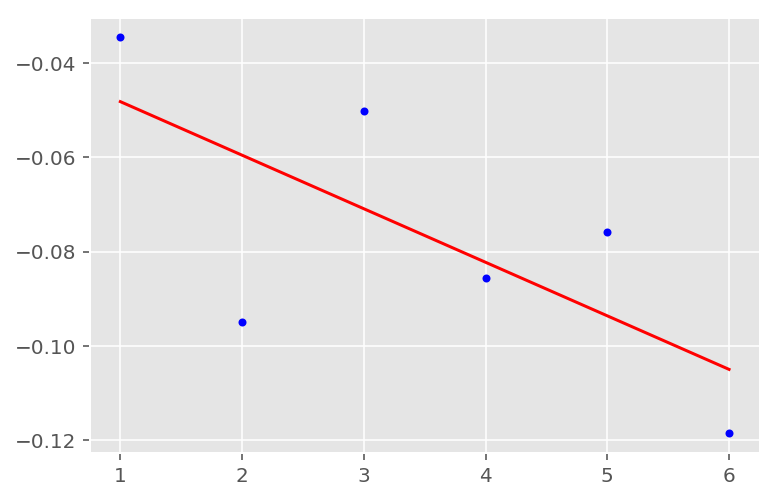

In [95]:
xs = trythis.condition_ind.values
ys = fit.slope * xs + fit.intercept

plt.plot(xs, ys, 'r-')
plt.plot(trythis.condition_ind, trythis.distance, 'b.')
plt.show()

In [97]:
def find_slope(xs, ys):
    fit = linregress(xs, ys)
    return fit.slope

In [107]:
grouped = accuracy.groupby(['participant', 'condition'])[['condition_ind', 'distance']]

In [114]:
grouped.get_group(('P37', 'Occlusion_NoCue_LeftToRight'))

,condition_ind,distance
140,2.0,-0.047240
141,3.0,-0.066774
142,4.0,-0.048417
143,5.0,-0.108132
145,1.0,-0.022916
149,6.0,-0.095168


In [117]:
fitted = pd.DataFrame()

for name, group in grouped:
    
    group = group.sort_values(by = 'condition_ind')
    fit = linregress(group.condition_ind, group.distance)
    
    to_add = pd.Series()
    to_add['participant'] = name[0]
    to_add['condition'] = name[1]
    to_add['slope'] = fit.slope
    to_add['intercept'] = fit.intercept
    to_add['idcs'] = group.condition_ind.values
    to_add['ds'] = group.distance.values
    
    fitted = fitted.append(to_add, ignore_index = True)

In [123]:
fitted.head()

,condition,ds,idcs,intercept,participant,slope
0,Occlusion_Cue_LeftToRight,"[-0.062737, -0.009695, -0.08132, -0.041173, -0...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",-0.028993,P07,-0.007891
1,Occlusion_Cue_RightToLeft,"[-0.035324, -0.07931, -0.082466, -0.059111, -0...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",-0.052759,P07,-0.004038
2,Occlusion_NoCue_LeftToRight,"[-0.009502, -0.094429, -0.040204, -0.060545, -...","[1.0, 3.0, 4.0, 5.0, 6.0]",-0.019743,P07,-0.009429
3,Occlusion_NoCue_RightToLeft,"[-0.055344, -0.046871, -0.042963, -0.064675, -...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",-0.031268,P07,-0.008725
4,Visible_Cue_LeftToRight,"[0.015453, 0.004968, -0.015042, -0.005402, -0....","[1.0, 2.0, 3.0, 5.0, 6.0]",0.011706,P07,-0.003910


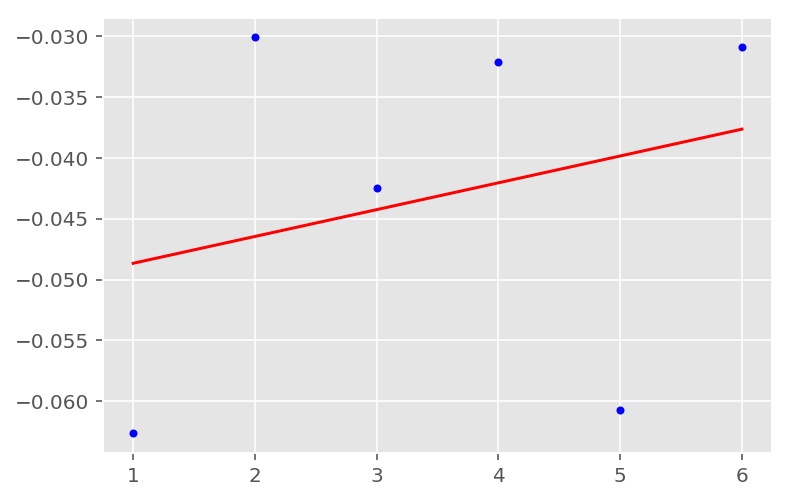

10    0.002207
Name: slope, dtype: float64


In [159]:
l = fitted[(fitted.participant == 'P08') & (fitted.condition == 'Occlusion_NoCue_LeftToRight')]

plt.plot(l.idcs.values[0], (l.slope * l.idcs.values + l.intercept).values[0], 'r-')
plt.plot(l.idcs.values[0], l.ds.values[0], 'b.')
plt.show()

print l.slope

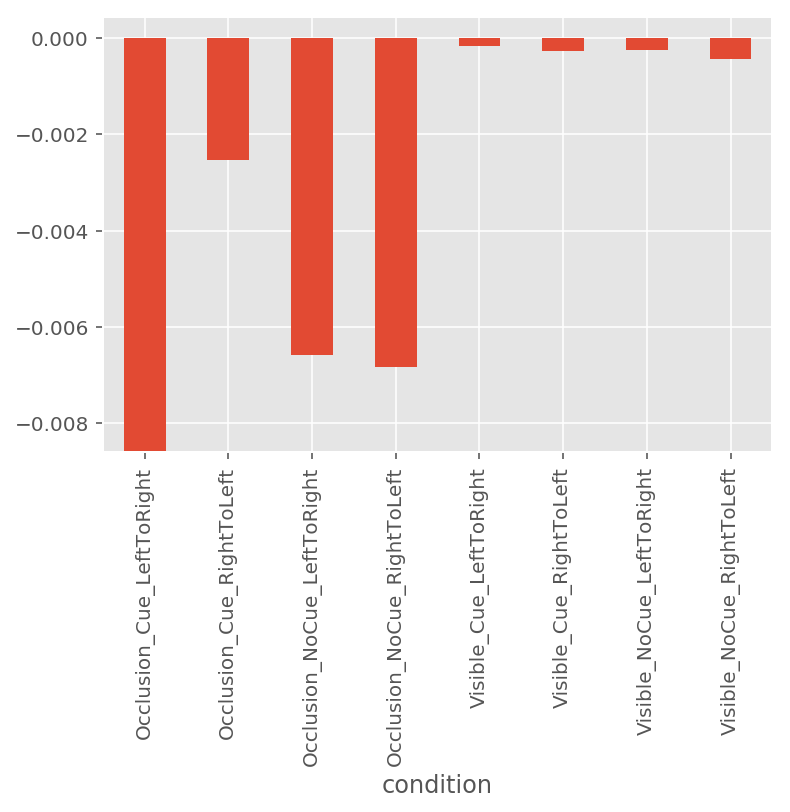

In [164]:
fitted.groupby(['condition'])['slope'].aggregate(np.mean).plot(kind = 'bar')
plt.show()

In [165]:
fitted.describe()

,intercept,slope
count,139.000000,139.000000
mean,-0.023263,-0.003262
std,0.031748,0.006782
min,-0.160446,-0.023116
25%,-0.039884,-0.005904
50%,-0.012217,-0.001826
75%,-0.002071,0.000710
max,0.035854,0.011332
